In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [51]:
df = pd.read_excel("Social_Network_Ads.xlsx")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


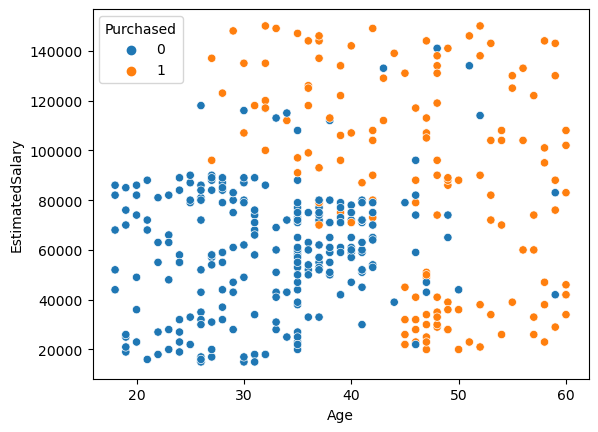

In [52]:
sns.scatterplot(x="Age",y="EstimatedSalary",data=df,hue="Purchased")
plt.show()

In [53]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [54]:
x = df.iloc[:,:-1]
y = df["Purchased"]

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [58]:
from sklearn.tree import DecisionTreeClassifier

#### Applying Pre-Pruning method to reduce overfitting in model using max_depth fuction.

In [92]:
dt = DecisionTreeClassifier(max_depth=3) #We are using max_depth function for pre-pruning
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

#### Checking Overfitting 
##### If test data showing bad score than training data it means our module have overfit.

In [93]:
#After apllying max_depth fuction in decision tree it showing best score than before 1st score was 83 and now current score is 90.
dt.score(x_test,y_test)*100

91.25

In [94]:
dt.score(x_train,y_train)*100    #See test data bad score than training data it means our module have overfit 

91.875

E:\Anaconda Navigator\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


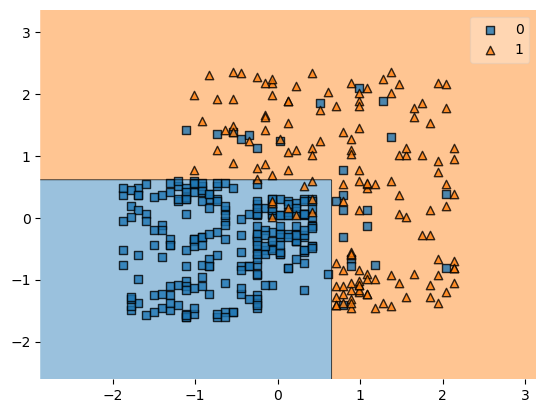

In [95]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()

In [96]:
from sklearn.tree import plot_tree

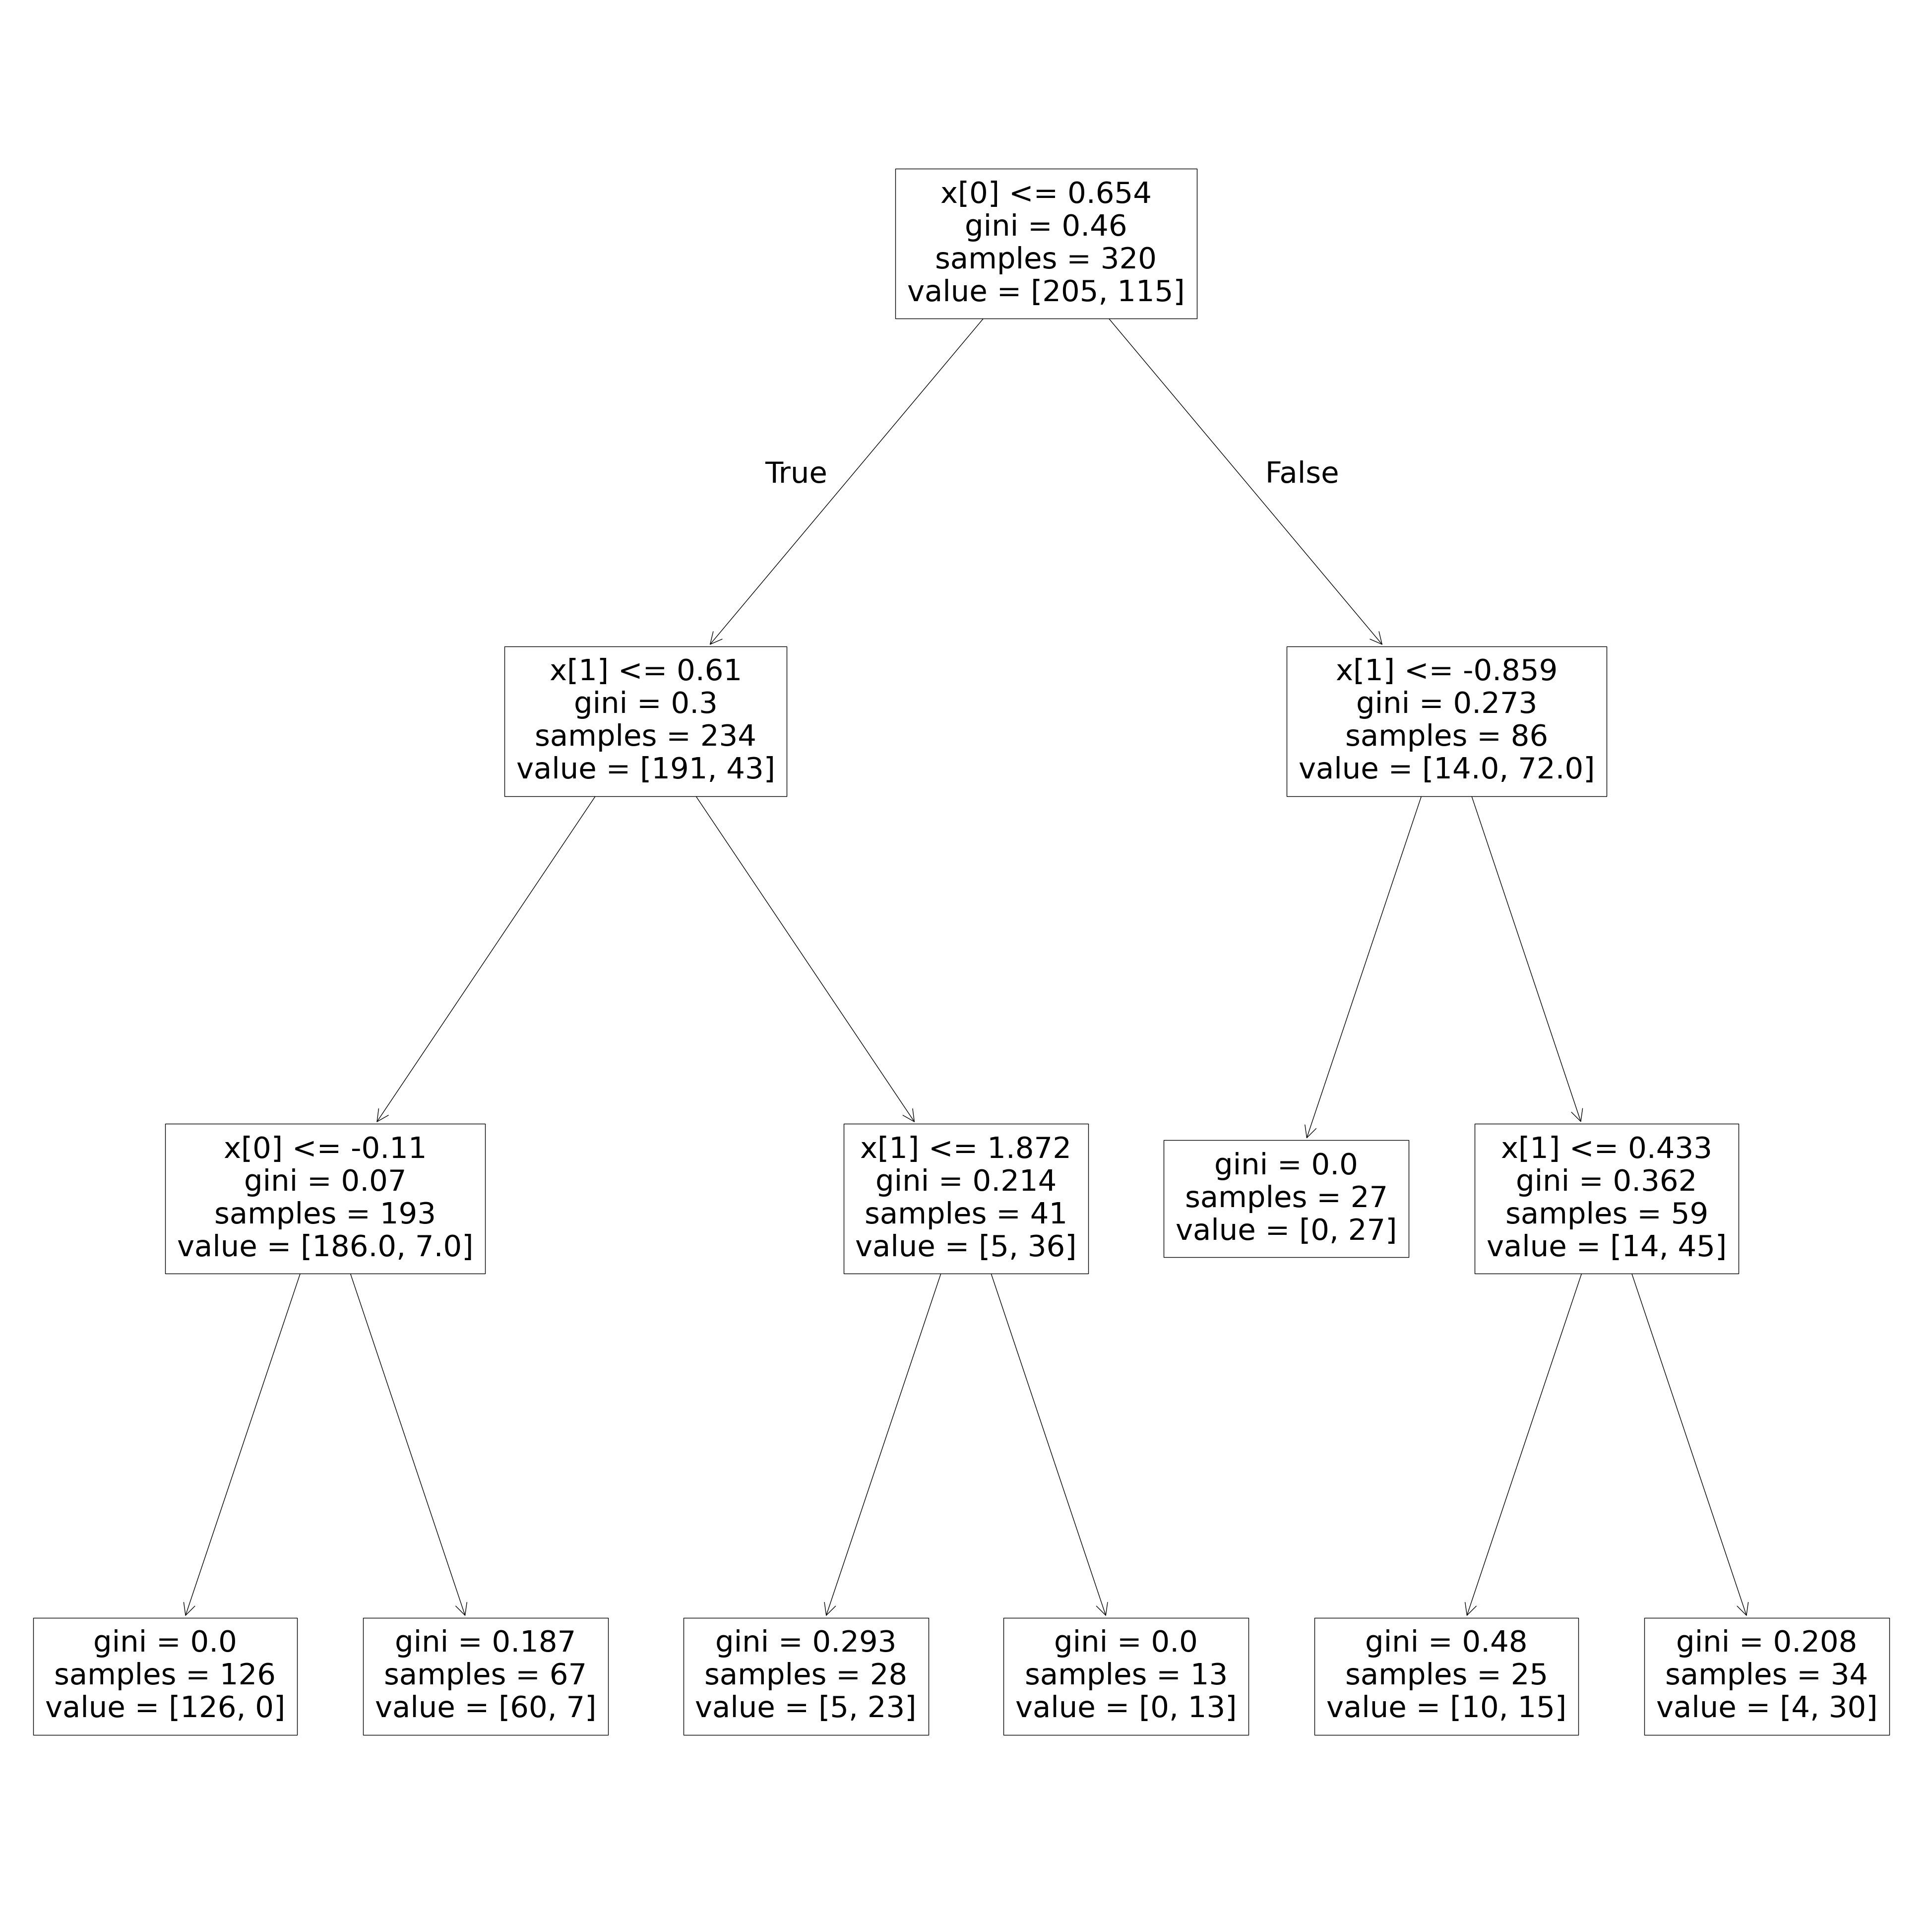

In [97]:
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.savefig("dt.jpg")
plt.show()

### Post-Pruning

In [98]:
for i in range(1,20):
    dt2 = DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train,y_train)
    print(dt2.score(x_train,y_train),dt2.score(x_test,y_test),i)

0.821875 0.9 1
0.91875 0.9125 2
0.91875 0.9125 3
0.93125 0.9125 4
0.934375 0.9 5
0.95 0.8625 6
0.96875 0.85 7
0.971875 0.85 8
0.98125 0.85 9
0.984375 0.85 10
0.990625 0.8375 11
0.99375 0.8375 12
0.996875 0.8375 13
0.996875 0.8375 14
0.996875 0.8375 15
0.996875 0.8375 16
0.996875 0.8375 17
0.996875 0.8375 18
0.996875 0.8375 19


In [99]:
dt1 = DecisionTreeClassifier(criterion="entropy")
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [100]:
dt1.predict([[35,20000]])

E:\Anaconda Navigator\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)